In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_excel('./Data.xlsx')

df.columns = ['Регион', *df.columns[1:]]
df = df.dropna()
df = df.drop(['растениеводства','животноводства'], axis=1)
df = df.set_index('Регион')
df.head(5)

,"Территория ,тыс. Км","Численность населения на 1 января 2004 г.2), тыс. Человек","Среднегодовая численность занятых в экономике, тыс. Человек","Среднедушевые денежные доходы (в месяц), руб.","Среднедушевые денежные расходы и сбере жения (в месяц), руб.","Среднемесячная номинальная начисленная заработная плата работающи в экономике, руб.","Валовой региональный продукт в 2002 г., млн. руб.","Основные фонды в экономике (по полной учетной стоимости; на конец года), млн. руб.","объем промышленной продукции, млн. руб.","Продукция сельского хозяйства всего, млн. руб.","Ввод в действие общей nплощади жилых домов, тыс. м2 общей площади","Оборот розничной торговли, млн. руб.","Сальдированный финансовый результат (прибыль минус убыток) деятельности организаций, млн. руб.","Инвестиции в основной капитал, млн. руб."
Регион,,,,,,,,,,,,,,
Центральный федеральный округ,650.7,37733.5,17735.5,7211.2,7426.5,5872.8,3227843.4,8379404,1643534,263021,13320.0,1774813,803909,532877
Белгородская область,27.1,1513.1,668.3,3357.4,3076.1,4468.6,65702,241450,80588,23903,671.0,29081,1818,14697
Брянская область,34.9,1361.1,602.3,3134.6,2971.1,3316.0,41327.6,186607,28180,13897,222.0,24600,587,6049
Владимирская область,29.0,1503.7,717.9,2842,2863,4024.6,53294.9,219129,64132,12128,279.0,20234,773,9320
Воронежская область,52.4,2353.6,1065.9,3391.2,3351.6,3549.1,88151.6,375512,66563,29419,750.0,52609,-655,19585


#### Convert to numeric data

In [30]:
for i in df.columns:
    df[i] = pd.to_numeric(df[i])

In [31]:
converter_dict = {'X0': 'Территория ,тыс. Км',
 'X1': 'Численность населения на 1 января 2004 г.2), тыс. Человек',
 'X2': 'Среднегодовая численность занятых в экономике, тыс. Человек ',
 'X3': 'Среднедушевые денежные доходы (в месяц), руб.',
 'X4': 'Среднедушевые денежные расходы и сбере жения (в месяц), руб.',
 'X5': 'Среднемесячная номинальная начисленная заработная плата работающи в экономике, руб.',
 'X6': 'Основные фонды в экономике (по полной учетной стоимости; на конец года), млн. руб.',
 'X7': 'объем промышленной продукции, млн. руб.',
 'X8': 'Продукция сельского хозяйства всего, млн. руб.',
 'X9': 'Ввод в действие общей nплощади жилых домов, тыс. м2 общей площади',
 'X10': 'Оборот розничной торговли, млн. руб.',
 'X11': 'Сальдированный финансовый результат (прибыль минус убыток) деятельности организаций, млн. руб.',
 'X12': 'Инвестиции в основной капитал, млн. руб.',
 'Y': 'Валовой региональный продукт в 2002 г., млн. руб.'}
converter_dict

{'X0': 'Территория ,тыс. Км',
 'X1': 'Численность населения на 1 января 2004 г.2), тыс. Человек',
 'X2': 'Среднегодовая численность занятых в экономике, тыс. Человек ',
 'X3': 'Среднедушевые денежные доходы (в месяц), руб.',
 'X4': 'Среднедушевые денежные расходы и сбере жения (в месяц), руб.',
 'X5': 'Среднемесячная номинальная начисленная заработная плата работающи в экономике, руб.',
 'X6': 'Основные фонды в экономике (по полной учетной стоимости; на конец года), млн. руб.',
 'X7': 'объем промышленной продукции, млн. руб.',
 'X8': 'Продукция сельского хозяйства всего, млн. руб.',
 'X9': 'Ввод в действие общей nплощади жилых домов, тыс. м2 общей площади',
 'X10': 'Оборот розничной торговли, млн. руб.',
 'X11': 'Сальдированный финансовый результат (прибыль минус убыток) деятельности организаций, млн. руб.',
 'X12': 'Инвестиции в основной капитал, млн. руб.',
 'Y': 'Валовой региональный продукт в 2002 г., млн. руб.'}

In [32]:
def convert_columns_to_x():
    df.columns = converter_dict.keys()
    
def restore_columns():
    df.columns = converter_dict.values()

In [33]:
convert_columns_to_x()
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
Регион,,,,,,,,,,,,,,
Центральный федеральный округ,650.7,37733.5,17735.5,7211.2,7426.5,5872.8,3227843.4,8379404,1643534,263021,13320.0,1774813,803909,532877
Белгородская область,27.1,1513.1,668.3,3357.4,3076.1,4468.6,65702.0,241450,80588,23903,671.0,29081,1818,14697
Брянская область,34.9,1361.1,602.3,3134.6,2971.1,3316.0,41327.6,186607,28180,13897,222.0,24600,587,6049
Владимирская область,29.0,1503.7,717.9,2842.0,2863.0,4024.6,53294.9,219129,64132,12128,279.0,20234,773,9320
Воронежская область,52.4,2353.6,1065.9,3391.2,3351.6,3549.1,88151.6,375512,66563,29419,750.0,52609,-655,19585


In [34]:
df.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01,9.200000e+01,9.200000e+01,92.000000,92.000000,9.200000e+01,92.000000,92.000000
mean,405.488043,2984.906522,1356.054348,4577.071739,3916.790217,5611.575000,1.951965e+05,6.916726e+05,1.604115e+05,25220.565217,731.673913,8.475655e+04,25344.097826,45824.641304
std,941.338173,5931.640298,2707.015625,2697.586739,1855.848279,3410.026581,4.301579e+05,1.354849e+06,3.159875e+05,49939.367363,1752.253451,2.140902e+05,90844.903688,94017.967616
min,7.600000,17.500000,11.300000,1391.800000,524.400000,2409.200000,8.701000e+02,3.933000e+03,1.060000e+02,29.000000,3.000000,3.660000e+02,-1697.000000,418.000000
25%,36.300000,724.675000,334.000000,3084.850000,2850.350000,3636.025000,2.899402e+04,1.332925e+05,2.114050e+04,4957.500000,103.500000,1.547275e+04,19.750000,6883.250000
50%,86.500000,1280.300000,604.400000,3789.600000,3623.300000,4440.500000,6.223885e+04,2.579905e+05,5.605200e+04,11639.000000,235.500000,2.658600e+04,1901.000000,14749.500000
75%,354.400000,2650.900000,1165.450000,5017.075000,4694.825000,5887.150000,1.452470e+05,4.950502e+05,1.232555e+05,23435.000000,568.250000,6.324925e+04,15017.750000,31106.500000
max,6215.900000,37733.500000,17735.500000,15962.200000,10593.900000,20027.200000,3.227843e+06,8.379404e+06,1.663681e+06,298005.000000,13320.000000,1.774813e+06,803909.000000,532877.000000


<AxesSubplot:>

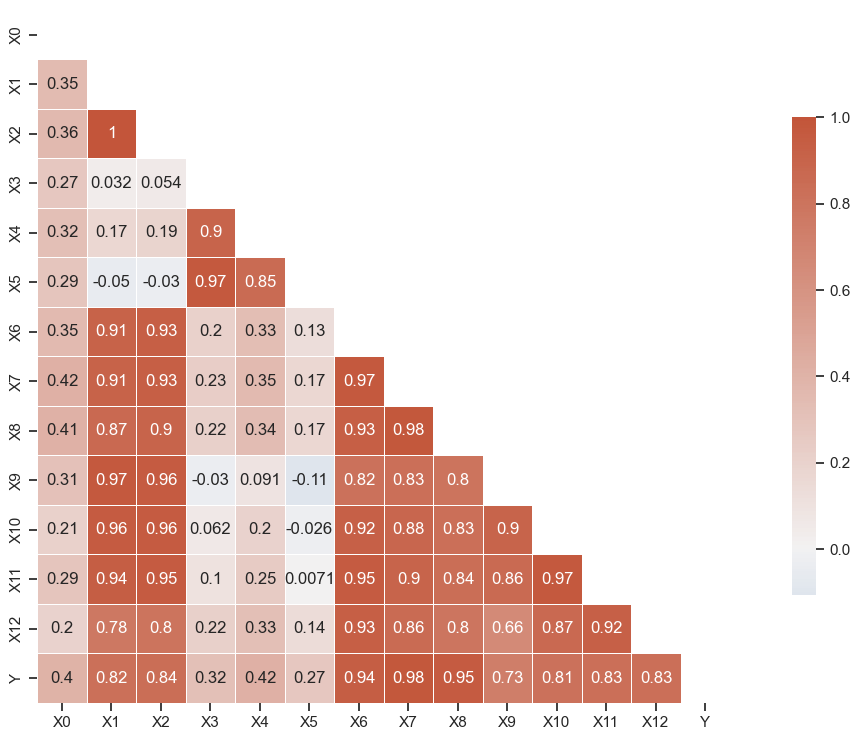

In [35]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 1 , center=0,
    square=True, linewidths=.6, cbar_kws={"shrink": .69}, annot = True)

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(f_regression, k=4).fit(df[sorted(converter_dict.keys())[0:-1]], df['Y'])

In [37]:
features = ['X'+str(i) for i,j in enumerate(selector._get_support_mask()) if j == True]
features

['X5', 'X9', 'X10', 'X11']

In [38]:
anomaly = list()

for i in features:
    df_mask = df[i] > df[i].std() * 3
    anomaly.append(df[df_mask].index.to_list())
    df = df[~df_mask]

v = []
for item in anomaly:
    for item2 in item:
        v.append(item2)

set(v)

{'Дальневосточный федеральный округ',
 'Камчатская область',
 'Краснодарский край',
 'Московская область',
 'Приволжский федеральный округ',
 'Ростовская область',
 'Самарская область',
 'Свердловская область',
 'Северо-Западный федеральный округ',
 'Сибирский федеральный округ',
 'Таймырский (Долгано-Ненецкий) автономный округ',
 'Тюменская область',
 'Уральский федеральный округ',
 'Ханты-Мансийский автономный округ - Югра',
 'Центральный федеральный округ',
 'Чукотский автономный округ',
 'Южный федеральный округ',
 'Ямало-Ненецкий автономный округ',
 'в том числе Ненецкий автономный округ'}

<AxesSubplot:>

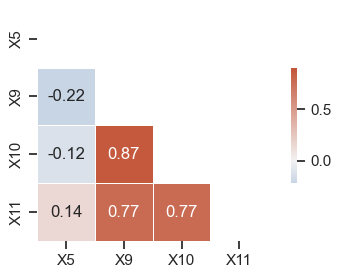

In [39]:
# Compute the correlation matrix
corr = df[features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.9, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

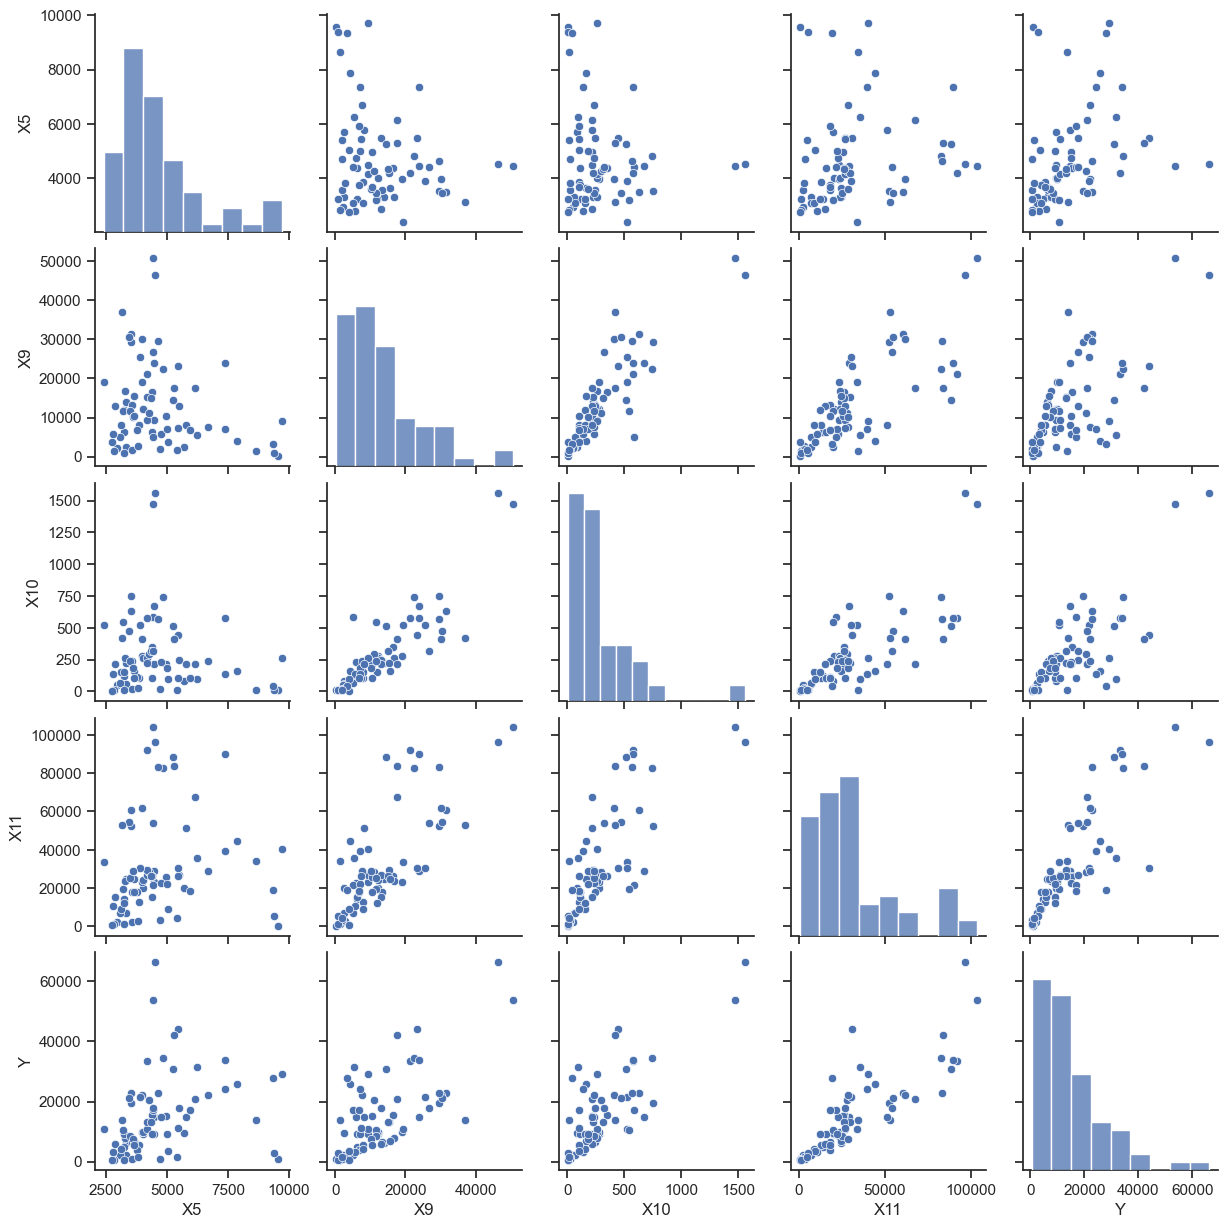

In [40]:
sns.set_theme(style="ticks")

sns.pairplot(df[[*features, 'Y']])

In [41]:
import statsmodels.api as sm

exog = sm.add_constant(df[features])
endog = df['Y']
mod = sm.OLS(endog, exog)
res = mod.fit()

In [42]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     78.70
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           8.82e-25
Time:                        16:02:01   Log-Likelihood:                -731.38
No. Observations:                  73   AIC:                             1473.
Df Residuals:                      68   BIC:                             1484.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8402.2777   2428.488     -3.460      0.001   -1.32e+04   -3556.305
X5             2.2529      0.457      4.929      0.000       1.341       3.165
X9            -0.0605      0.144     -0.421      0.675      -0.347       0.226
X10           23.3850      4.965      4.710      0.000      13.478      33.292
X11            0.2200      0.048      4.603      0.000       0.125       0.315
==============================================================================
Omnibus:                       35.633   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.270
Skew:                           1.477   Prob(JB):                     1.14e-24
Kurtosis:                       8.246   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
features.pop(2)

'X10'

In [44]:
exog = sm.add_constant(df[features])
endog = df['Y']
mod = sm.OLS(endog, exog)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     74.63
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.29e-21
Time:                        16:02:01   Log-Likelihood:                -741.68
No. Observations:                  73   AIC:                             1491.
Df Residuals:                      69   BIC:                             1501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9040.2556   2772.088     -3.261      0.002   -1.46e+04   -3510.091
X5             2.2033      0.522      4.217      0.000       1.161       3.246
X9             0.3618      0.128      2.818      0.006       0.106       0.618
X11            0.2845      0.052      5.433      0.000       0.180       0.389
==============================================================================
Omnibus:                       24.436   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.466
Skew:                           1.138   Prob(JB):                     1.81e-11
Kurtosis:                       6.329   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Коэффициенты эластичности

In [45]:
res.params * df[features].mean() / df['Y'].mean()

X11      0.600732
X5       0.693373
X9       0.314745
const         NaN
dtype: float64

In [46]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
new_df = df[[*features, 'Y']].copy()
new_df[[*features, 'Y']] = sc.fit_transform(new_df[[*features, 'Y']].copy())

In [47]:
new_df[[*features, 'Y']]

,X5,X9,X11,Y
Регион,,,,
Белгородская область,-0.120347,1.033901,-0.088325,-0.011725
Брянская область,-0.800355,0.092288,-0.262619,-0.682801
Владимирская область,-0.382297,-0.074183,-0.432440,-0.428975
Воронежская область,-0.662831,1.552982,0.826824,0.367579
Ивановская область,-0.836579,-0.634012,-0.670096,-0.782594
...,...,...,...,...
Хабаровский край,1.590527,-0.559293,0.314600,0.721508
Амурская область,0.741963,-0.566915,-0.510505,0.172185
Магаданская область,2.780806,-1.137002,-1.012888,-0.922272


In [48]:
exog = new_df[features]
endog = new_df['Y']
mod = sm.OLS(endog, exog)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              75.71
Date:                Sat, 26 Nov 2022   Prob (F-statistic):                    6.28e-22
Time:                        16:02:01   Log-Likelihood:                         -50.816
No. Observations:                  73   AIC:                                      107.6
Df Residuals:                      70   BIC:                                      114.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X5             0.2898      0.068      4.248      0.000       0.154       0.426
X9             0.2984      0.105      2.838      0.006       0.089       0.508
X11            0.5676      0.104      5.473      0.000       0.361       0.774
==============================================================================
Omnibus:                       24.436   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.466
Skew:                           1.138   Prob(JB):                     1.81e-11
Kurtosis:                       6.329   Cond. No.                         3.36
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Расчет частных коэффициентов Фишера для чистой регрессии

In [49]:
for feature in features:    
    fisher =res._results.rsquared - np.corrcoef(new_df[feature], new_df['Y'])[0, 1] \
        / (1 - res._results.rsquared) * (new_df['Y'].count() - len(features) - 1)
    print(fisher,':' , feature)

-88.99090351634938 : X5
-195.70906244041367 : X9
-244.57024143401767 : X11


In [50]:
exog = sm.add_constant(df[features])
endog = df['Y']
mod = sm.OLS(endog, exog)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     74.63
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.29e-21
Time:                        16:02:01   Log-Likelihood:                -741.68
No. Observations:                  73   AIC:                             1491.
Df Residuals:                      69   BIC:                             1501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9040.2556   2772.088     -3.261      0.002   -1.46e+04   -3510.091
X5             2.2033      0.522      4.217      0.000       1.161       3.246
X9             0.3618      0.128      2.818      0.006       0.106       0.618
X11            0.2845      0.052      5.433      0.000       0.180       0.389
==============================================================================
Omnibus:                       24.436   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.466
Skew:                           1.138   Prob(JB):                     1.81e-11
Kurtosis:                       6.329   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
from statsmodels.stats.diagnostic import het_white

white_test = het_white(res.resid, res.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
for i,j in zip(labels, white_test):
    print(f'{i}:{j}')


Test Statistic:28.79675903395
Test Statistic p-value:0.0007012140369052183
F-Statistic:4.560238318101383
F-Test p-value:0.00012017378546211663


### Средняя ошибка аппроксимации

In [52]:
arr = df[features].values
arr = np.append(np.ones(arr.shape[0]).reshape(-1,1),arr, axis=1)

A = np.mean(np.abs(res.predict(arr) - df['Y']) / df['Y']) * 100
f'Средняя ошибка аппроксимации: {A:.4}%'

'Средняя ошибка аппроксимации: 76.27%'

In [53]:
arr =(df[features].max()*0.8).to_numpy().reshape(-1,1)
arr = np.append(1,arr)

print(df[features].max()*0.8)

f'result: {res.predict(arr)}'

X5      7757.92
X9     40615.20
X11    83028.00
dtype: float64


'result: [46370.2138673]'

In [54]:
df['reg_y'] = res.fittedvalues


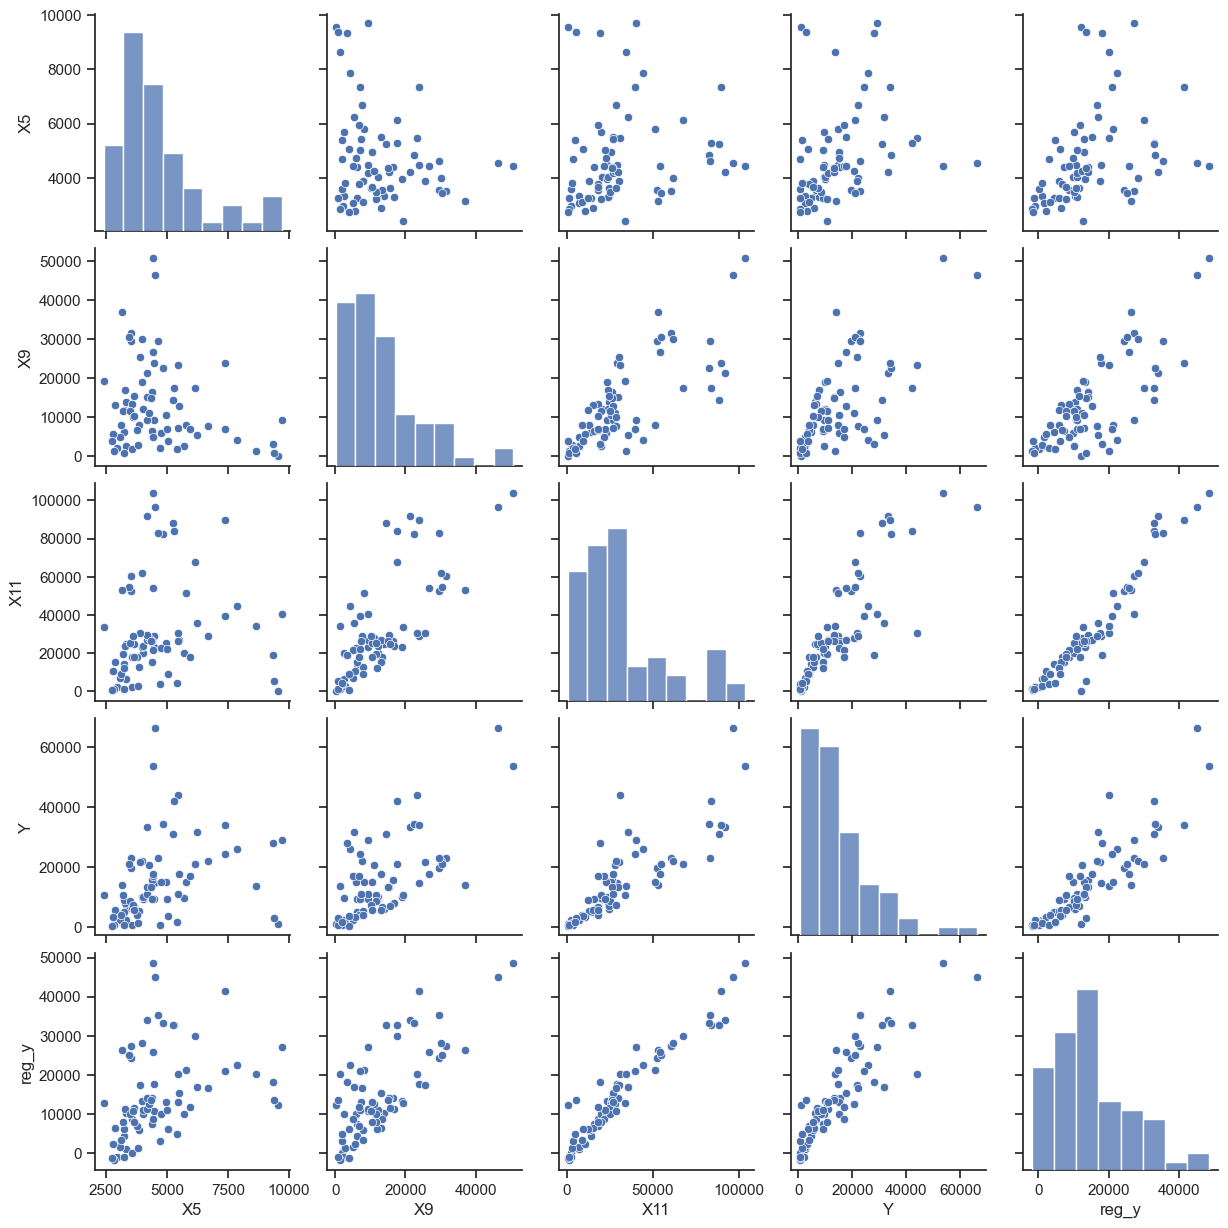

In [55]:
sns.pairplot(data=df[[*features, 'Y', 'reg_y']])

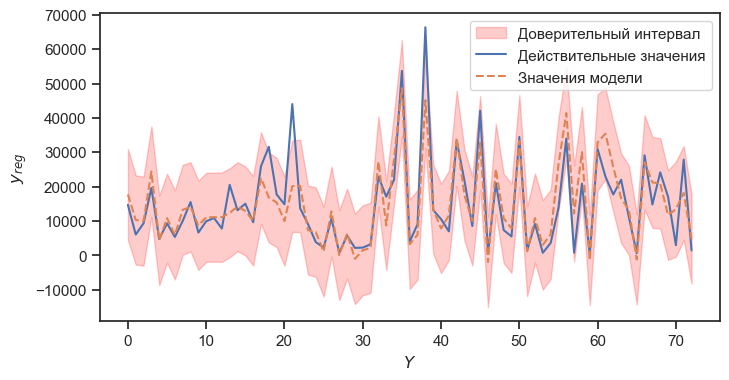

In [59]:
pred_ols = res.get_prediction()

iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_xlabel('$Y$')
ax.set_ylabel(r'$y_{reg}$')
ax.fill_between(x = np.arange(df['Y'].shape[0]), y1 = iv_u, y2 = iv_l, alpha=0.2, color='red', label='Доверительный интервал')
ax.plot(df['Y'].values, label='Действительные значения')
ax.plot(df['reg_y'].values, ls='--', label = 'Значения модели')

ax.legend()